In [1]:
import pandas as pd
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df= sns.load_dataset("penguins").iloc[:, [2,3,4,5, 0]]

df= df[df["species"] != "Chinstrap"]

df= df.dropna()
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Gentoo
340,46.8,14.3,215.0,4850.0,Gentoo
341,50.4,15.7,222.0,5750.0,Gentoo
342,45.2,14.8,212.0,5200.0,Gentoo


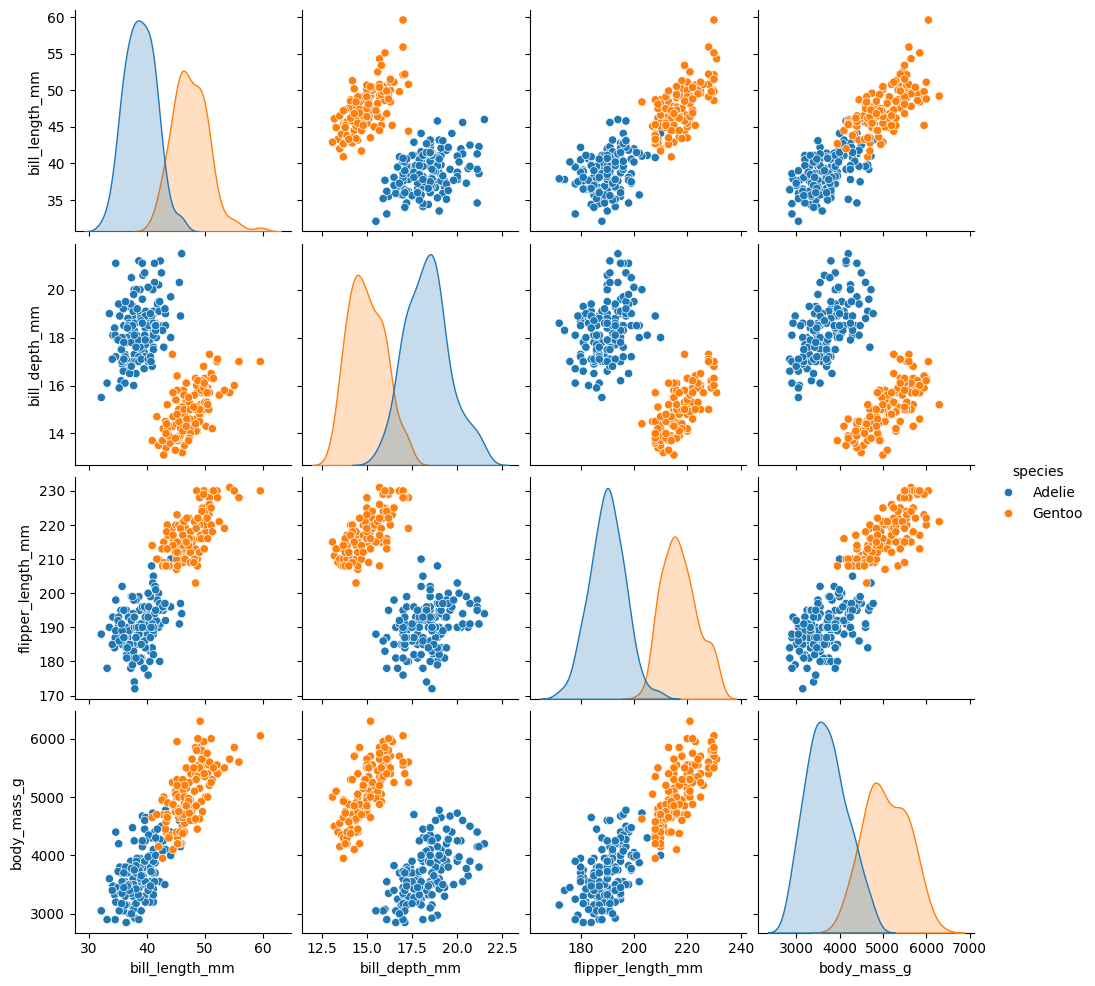

In [3]:
sns.pairplot(data=df, hue="species")

In [4]:
df["species"].value_counts()




species
Adelie    151
Gentoo    123
Name: count, dtype: int64

In [5]:
x= df[["bill_depth_mm", "flipper_length_mm"]]
y= df["species"]


In [6]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, train_size=0.8, stratify=y)

In [7]:
ytrain.value_counts()



species
Adelie    121
Gentoo     98
Name: count, dtype: int64

In [8]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((219, 2), (55, 2), (219,), (55,))

In [18]:
le= LabelEncoder()
ytrain=le.fit_transform(ytrain)




In [10]:
ytest=le.transform(ytest)


In [11]:
svc_model=SVC()
svc_model.fit(xtrain, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [12]:
accuracy_score(y_true=ytest, y_pred=svc_model.predict(xtest))

1.0

In [13]:
accuracy_score(y_true=ytrain, y_pred=svc_model.predict(xtrain))

0.9817351598173516

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 274, dtype: object

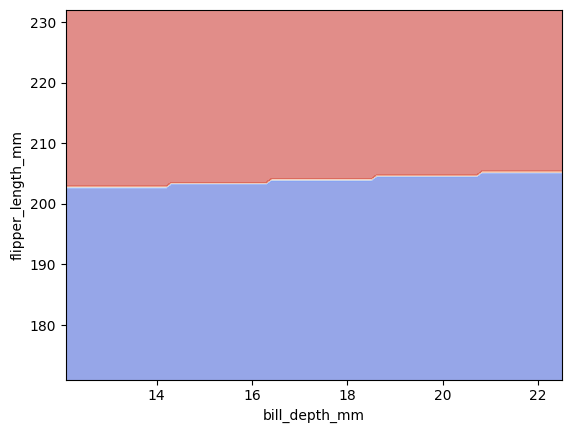

In [17]:
disp = DecisionBoundaryDisplay.from_estimator(
    svc_model, x, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.6
)

# Scatter plot (now using encoded y)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)

# Highlight support vectors
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=150, facecolors="none", edgecolors="yellow", linewidths=2)

plt.title("SVM Decision Boundary with Support Vectors")
plt.show()

